In [1]:
import json

from matplotlib import pyplot as plt
import pandas as pd
import pickle

In [2]:
#FILE = "/mnt/mids-capstone-irrigation-detection/models/supervised_results.csv"

# In my local machine it is this. If using aws instance use above path
FILE = "/home/cagastya/MIDS_Capstone/data/models/supervised_results.csv"

In [3]:
# Models are model_name: description
models = {
    "supervised_baseline": "Balanced Dataset",
    "supervised_baseline_ex": "Balanced Extended Labels",
    "supervised_baseline_pretrained": "ImageNet Pretraining",
    "supervised_baseline_pretrained_ex": "ImageNet Pretraining with Extended Labels"
}

In [31]:
def load_data():
    df = pd.read_csv(FILE)
    return df.drop(df.columns[0], axis = 1)
    

def plot_results(plot_df, title=None):
    _title = "Accuracy vs Data Splits"
    if title is not None:
        _title += f" - {title}"
    #plot_df.plot(kind="bar", figsize=(15,10), rot=0, ylim=(0.0, 1.0), fontsize=14)
    plot_df.plot(kind="line", figsize=(6,4), rot=0, ylim=(0.0, 1.0), fontsize=10)
    plt.title(_title, fontsize=10)
    plt.legend(fontsize=8)
    plt.xlabel("Percent Labeled Data", fontsize=10)
    plt.ylabel("Accuracy", fontsize=10)
    
def convert_to_plot(df, score):
    plot_df = df[[score, "architecture", "split_percent"]]
    plot_df = plot_df.pivot(
        index="split_percent", 
        columns="architecture", 
        values="accuracy"
    ).sort_values("split_percent", ascending=False)
    return plot_df

def display_results():
    df = load_data()
    for model_type, desc in models.items():
        _df = df[df.model_type == model_type]
        
        line = "=" * len(desc) + "=="
        print(f"\n\n{line}\n {desc}\n{line}")
        #display(_df.sort_values("split_percent"))

        plot_df = convert_to_plot(_df, 'accuracy')
        display(plot_df)
        plot_results(plot_df, desc)
        #plt.savefig(f"{model_type}.png")



 Balanced Dataset


architecture,InceptionV3,ResNet101V2,ResNet152,ResNet50,Xception
split_percent,,,,,
100,0.93925,0.93450,0.915600,0.93275,0.93975
50,0.93550,0.90925,0.936516,0.90650,0.93875
25,0.89875,0.92050,0.907726,0.91900,0.92925
10,0.78500,0.89825,0.885581,0.82050,0.89625
3,0.85025,0.83450,0.811024,0.77100,0.65925
1,0.56800,0.52425,0.777067,0.52225,0.49975




 Balanced Extended Labels


architecture,InceptionV3,ResNet101V2,ResNet152,ResNet50,Xception
split_percent,,,,,
100,0.888028,0.856050,0.871538,0.859056,0.885477
50,0.873269,0.819424,0.836826,0.863794,0.847577
25,0.850856,0.837008,0.851130,0.847303,0.840835
10,0.835550,0.847030,0.842839,0.813138,0.844479
3,0.824071,0.817420,0.801840,0.831906,0.830357
1,0.805029,0.808582,0.554391,0.559311,0.627187




 ImageNet Pretraining


architecture,InceptionV3,ResNet101V2,ResNet152,ResNet50,Xception
split_percent,,,,,
100,0.85600,0.88225,0.816929,0.82875,0.89575
50,0.85425,0.88475,0.790600,0.81050,0.88525
25,0.84125,0.85025,0.789616,0.81700,0.87650
10,0.82425,0.73550,0.725640,0.78925,0.83625
3,0.81675,0.84250,0.760827,0.77600,0.84625
1,0.77875,0.78150,0.704724,0.76625,0.82575




 ImageNet Pretraining with Extended Labels


architecture,InceptionV3,ResNet101V2,ResNet152,ResNet50,Xception
split_percent,,,,,
100,0.821793,0.846028,0.792821,0.793003,0.845117
50,0.811224,0.834001,0.784803,0.794734,0.845208
25,0.802660,0.829173,0.775237,0.763575,0.828626
10,0.743349,0.783710,0.754100,0.760933,0.822522
3,0.741345,0.780703,0.752278,0.720390,0.806214
1,0.777332,0.769133,0.737518,0.717474,0.784074


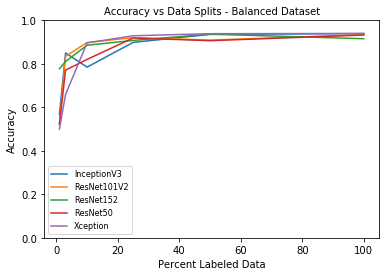

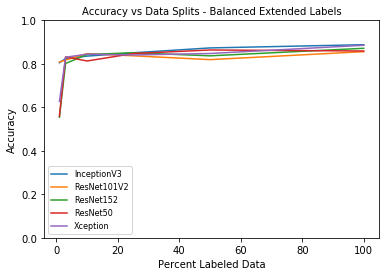

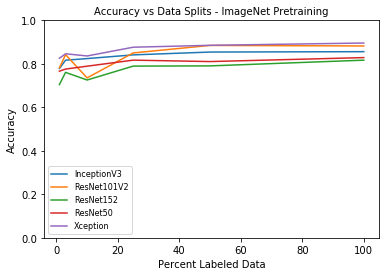

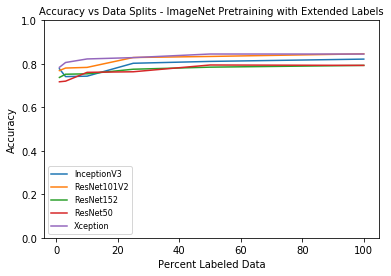

In [32]:
 display_results()

## Compare Architectures

Let us see how the architectures compare for the accuracy and F-Score for the given models

,model_type,split_percent,pretrain,architecture,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5
92,supervised_baseline_pretrained_ex,100,True,ResNet152,0.639255,4187.0,979.0,4515.0,1295.0,0.792821,0.810492,0.763772,0.873625,0.786439,0.794296
93,supervised_baseline_pretrained_ex,100,True,ResNet50,0.521545,4130.0,912.0,4574.0,1360.0,0.793003,0.819119,0.752277,0.879507,0.784276,0.795557
62,supervised_baseline_pretrained,100,True,ResNet152,0.438497,1593.0,304.0,1727.0,440.0,0.816929,0.839747,0.783571,0.903257,0.810687,0.820148
90,supervised_baseline_pretrained_ex,100,True,InceptionV3,0.398748,4672.0,1137.0,4348.0,819.0,0.821793,0.804269,0.850847,0.899177,0.826903,0.819218
63,supervised_baseline_pretrained,100,True,ResNet50,0.599143,1642.0,326.0,1673.0,359.0,0.828750,0.834350,0.820590,0.903555,0.827412,0.829712
94,supervised_baseline_pretrained_ex,100,True,Xception,0.347369,5013.0,1227.0,4263.0,473.0,0.845117,0.803365,0.913781,0.924599,0.855023,0.837081
91,supervised_baseline_pretrained_ex,100,True,ResNet101V2,0.432359,4892.0,1090.0,4394.0,600.0,0.846028,0.817787,0.890750,0.915484,0.852710,0.840742
60,supervised_baseline_pretrained,100,True,InceptionV3,0.356291,1778.0,355.0,1646.0,221.0,0.856000,0.833568,0.889445,0.928475,0.860600,0.851397
31,supervised_baseline_ex,100,False,ResNet101V2,259.448212,4534.0,627.0,4862.0,953.0,0.856050,0.878512,0.826317,0.926176,0.851615,0.860396
33,supervised_baseline_ex,100,False,ResNet50,0.348634,5233.0,1298.0,4196.0,249.0,0.859056,0.801256,0.954579,0.937729,0.871223,0.846581


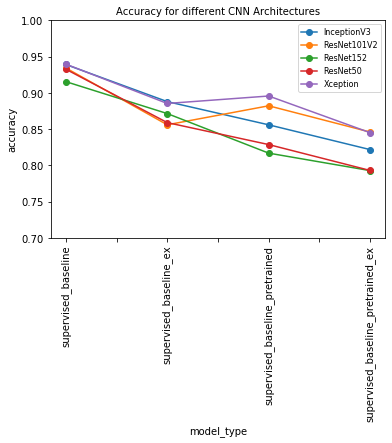

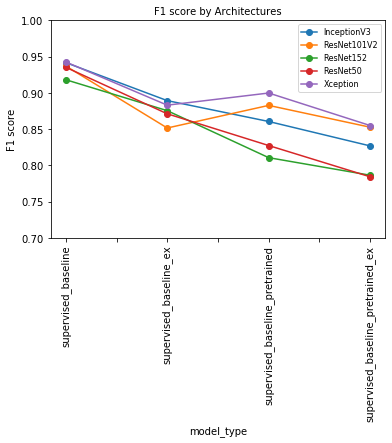

In [93]:
def plot_results(plot_df, xlab, ylab, title = None):
    _title = "Accuracy for different CNN Architectures" if not title else title
    
    plot_df.plot(kind="line", figsize=(6,4), marker = 'o',
                 rot=90, ylim=(0.70, 1.0), fontsize=10)
    plt.title(_title, fontsize=10)
    plt.legend(fontsize=8)
    plt.xlabel(xlab, fontsize=10)
    plt.ylabel(ylab, fontsize=10)
    
def convert_to_plot(df, score, series, ylbl):
    plot_df = df[[score, series, ylbl]]
    plot_df = plot_df.pivot(
        index= ylbl, 
        columns= series, 
        values= score
    ).sort_values(ylbl, ascending=True)
    return plot_df

_df = df[(df.model_type.isin(models.keys())) & 
         (df.split_percent == 100) ]

display(_df.sort_values("accuracy"))
plot_df = convert_to_plot(_df, 'accuracy', "architecture", "model_type")
plot_results(plot_df, "model_type", "accuracy")
#plt.savefig(f"{model_type}.png")

plot_df = convert_to_plot(_df, 'f1', "architecture", "model_type")
plot_results(plot_df, "model_type", "F1 score",
                         'F1 score by Architectures')

## Compare Performance with labeling Percentage

,model_type,split_percent,pretrain,architecture,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5
14,supervised_baseline,1,False,Xception,0.889790,0.0,0.0,1999.0,2001.0,0.499750,0.000000,0.000000,0.500000,0.000000,0.000000
44,supervised_baseline_ex,1,False,Xception,0.636070,5487.0,4087.0,1397.0,5.0,0.627187,0.573115,0.999090,0.869907,0.728395,0.668060
24,supervised_baseline,3,False,Xception,0.569571,703.0,62.0,1934.0,1301.0,0.659250,0.918954,0.350798,0.894042,0.507765,0.596774
54,supervised_baseline_ex,3,False,Xception,0.379902,4563.0,935.0,4551.0,927.0,0.830357,0.829938,0.831148,0.910119,0.830542,0.830341
49,supervised_baseline_ex,25,False,Xception,0.361002,4310.0,568.0,4919.0,1179.0,0.840835,0.883559,0.785207,0.928580,0.831485,0.848147
39,supervised_baseline_ex,10,False,Xception,0.392172,4478.0,698.0,4791.0,1009.0,0.844479,0.865147,0.816111,0.921330,0.839914,0.848160
59,supervised_baseline_ex,50,False,Xception,0.371103,4337.0,523.0,4966.0,1150.0,0.847577,0.892387,0.790414,0.936943,0.838311,0.855593
34,supervised_baseline_ex,100,False,Xception,0.293445,4749.0,520.0,4970.0,737.0,0.885477,0.901310,0.865658,0.952914,0.883124,0.889104
9,supervised_baseline,10,False,Xception,0.381884,1967.0,381.0,1618.0,34.0,0.896250,0.837734,0.983009,0.942280,0.904576,0.881141
19,supervised_baseline,25,False,Xception,0.230677,1958.0,245.0,1759.0,38.0,0.929250,0.888788,0.980962,0.958974,0.932603,0.917526


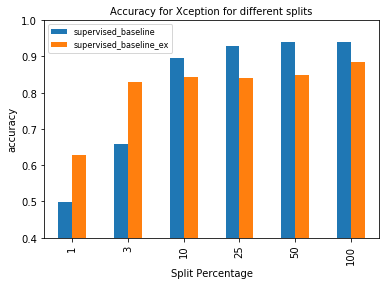

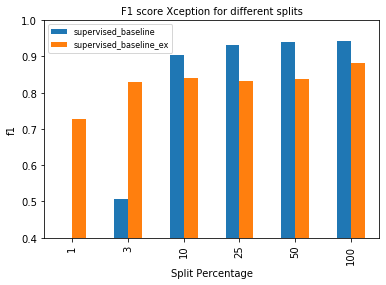

In [92]:
def plot_results(plot_df, xlab, ylab, title = None):
    _title = "Accuracy for different CNN Architectures" if not title else title
    
    plot_df.plot(kind="bar", figsize=(6,4), #marker = '.',
                 rot=90, ylim=(0.4, 1.0), fontsize=10)
    plt.title(_title, fontsize=10)
    plt.legend(fontsize=8)
    plt.xlabel(xlab, fontsize=10)
    plt.ylabel(ylab, fontsize=10)
    
def convert_to_plot(df, score, series, ylbl):
    plot_df = df[[score, series, ylbl]]
    plot_df = plot_df.pivot(
        index= ylbl, 
        columns= series, 
        values= score
    ).sort_values(ylbl, ascending=True)
    return plot_df

_df = df[(df.model_type.isin(['supervised_baseline', 'supervised_baseline_ex'])) &
         (df.architecture == 'Xception')]

display(_df.sort_values("accuracy"))
plot_df = convert_to_plot(_df, 'accuracy', "model_type", "split_percent",)
plot_results(plot_df, "Split Percentage", "accuracy",
            'Accuracy for Xception for different splits')
#plt.savefig(f"{model_type}.png")

plot_df = convert_to_plot(_df, 'f1' , "model_type", "split_percent")
plot_results(plot_df, "Split Percentage", "f1",
                         'F1 score Xception for different splits')